In [1]:
!pip install tensorflow opencv-python matplotlib



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import os

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = tf.keras.utils.image_dataset_from_directory('satellite')

Found 900 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

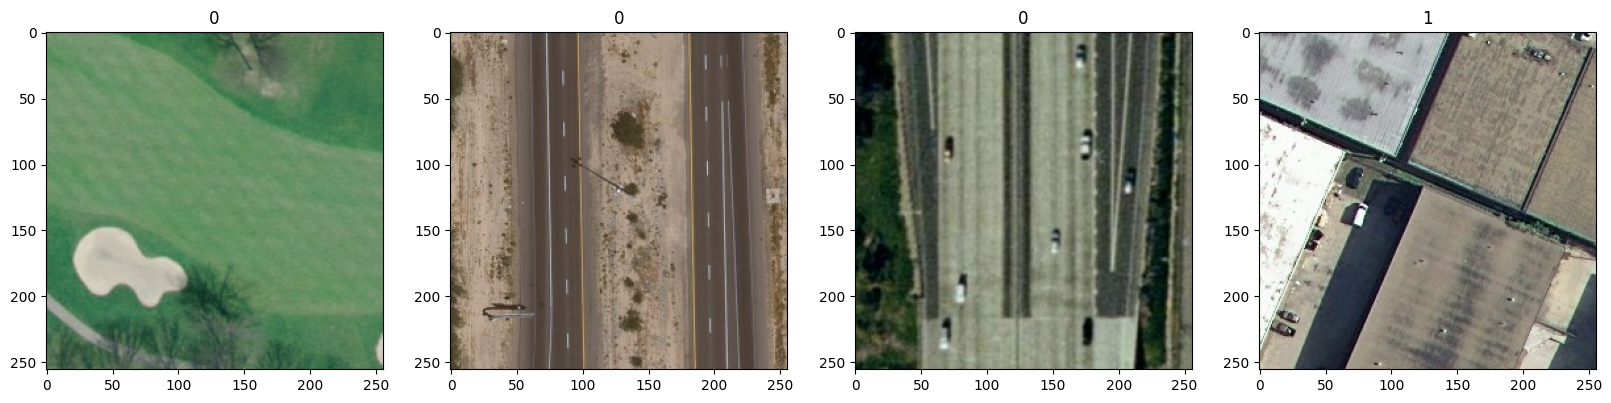

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
#preprocessing data

In [8]:
batch[0].max()

255.0

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
scaled_iterator = data.as_numpy_iterator()

In [11]:
scaledbatch =scaled_iterator.next()

In [12]:
scaledbatch[0].max()

1.0

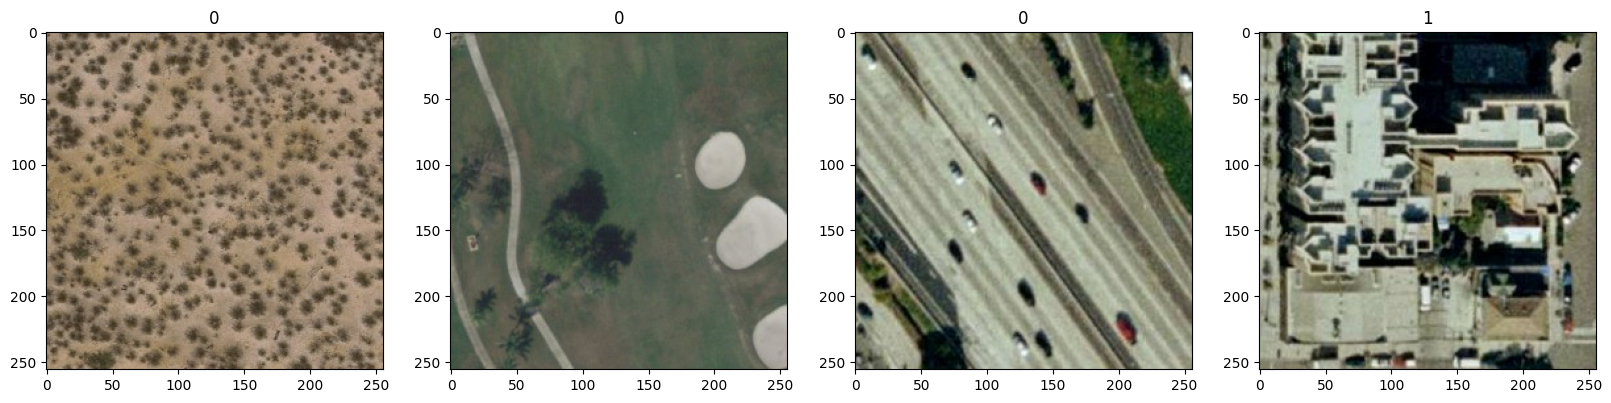

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaledbatch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

20

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
20/20 [==============================] - 36s 1s/step - loss: 0.6986 - accuracy: 0.6625 - val_loss: 0.4839 - val_accuracy: 0.7937
Epoch 2/10
20/20 [==============================] - 28s 1s/step - loss: 0.4905 - accuracy: 0.7750 - val_loss: 0.4610 - val_accuracy: 0.7688
Epoch 3/10
20/20 [==============================] - 29s 1s/step - loss: 0.3937 - accuracy: 0.8328 - val_loss: 0.3287 - val_accuracy: 0.8438
Epoch 4/10
20/20 [==============================] - 25s 1s/step - loss: 0.3029 - accuracy: 0.8750 - val_loss: 0.2623 - val_accuracy: 0.9062
Epoch 5/10
20/20 [==============================] - 24s 1s/step - loss: 0.2196 - accuracy: 0.9219 - val_loss: 0.1844 - val_accuracy: 0.9250
Epoch 6/10
20/20 [==============================] - 24s 1s/step - loss: 0.1536 - accuracy: 0.9469 - val_loss: 0.1277 - val_accuracy: 0.9750
Epoch 7/10
20/20 [==============================] - 25s 1s/step - loss: 0.0922 - accuracy: 0.9734 - val_loss: 0.1157 - val_accuracy: 0.9625
Epoch 8/10
20/20 [==

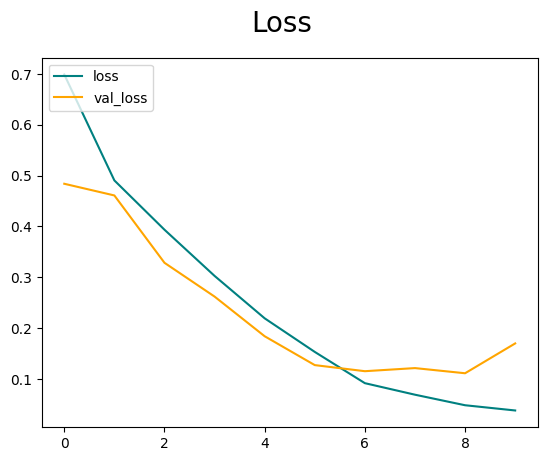

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

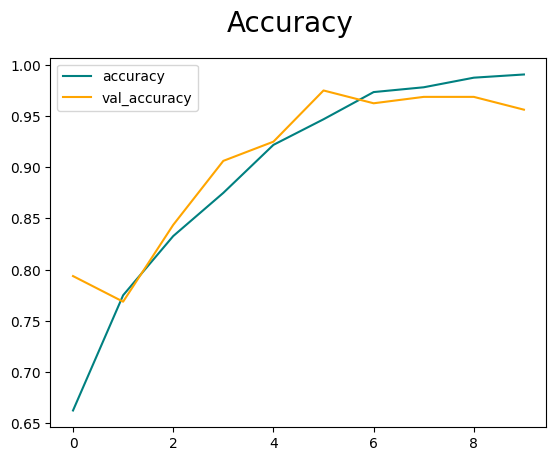

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 178ms/step


In [31]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.95, shape=(), dtype=float32) tf.Tensor(0.9047619, shape=(), dtype=float32) tf.Tensor(0.953125, shape=(), dtype=float32)


In [43]:
import cv2

In [1]:
img = cv2.imread('Screenshot 2023-05-28 172327')
plt.imshow(img)
plt.show()

NameError: name 'cv2' is not defined

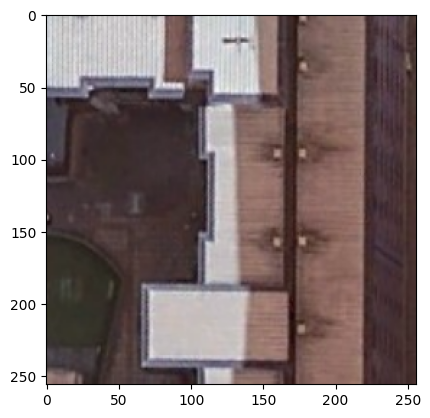

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [62]:
yhat

array([[0.7751728]], dtype=float32)

In [63]:
if yhat > 0.5: 
    print(f'Predicted class is urban')
else:
    print(f'Predicted class is rural')

Predicted class is urban
